In [2]:
#upload csv file
from google.colab import files

uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [1]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
#Reading data
diabetes = pd.read_csv("diabetes.csv")

#Creating dataframe
data = pd.DataFrame(diabetes)

#Checking data type
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [3]:
#Printing raw data
print(" ==================== Raw Data ==================== \n")

pd.set_option('display.max_rows', 10) 
pd.set_option('display.max_columns', None) #to show all columns
print(data, "\n")

 ==================== Raw Data ==================== 

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0          

preprocessing

In [4]:
#Calculating IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
data.shape

Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64


(768, 9)

In [5]:
#Detecting Total Outliers
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

Pregnancies                  4
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64

In [6]:
#Deleting outliers
df = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(639, 9)

In [7]:
#Detecting Missing Values
print()
print("=============== DETECTING MISSING VALUES =============== ")
df.isna().sum()


=============== DETECTING MISSING VALUES =============== 


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

RANDOM FOREST

In [8]:
from sklearn.model_selection import train_test_split
#features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
x = df.drop(['Outcome'], axis=1)
y = df['Outcome']

#implementing train-test-split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [9]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier

#random forest model creation
rfc = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=20)
rfc.fit(x_train,y_train)
#predictions
rfc_predict = rfc.predict(x_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

print("=== Confusion Matrix ===") 
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

=== Confusion Matrix ===
[[170   3]
 [ 56  27]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.75      0.98      0.85       173
           1       0.90      0.33      0.48        83

    accuracy                           0.77       256
   macro avg       0.83      0.65      0.67       256
weighted avg       0.80      0.77      0.73       256





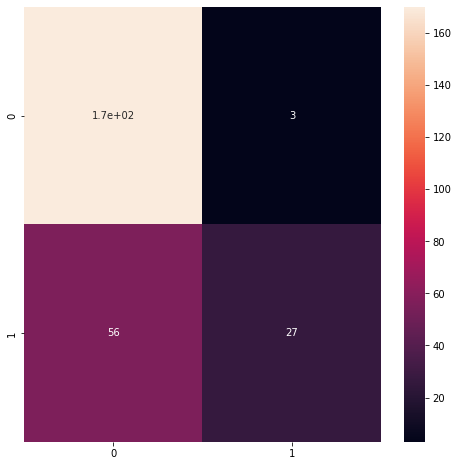

In [11]:
import seaborn as sns

plt.figure(figsize = (8, 8))
sns.heatmap(confusion_matrix(y_test, rfc_predict), annot = True)

In [12]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
#Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, rfc_predict))

Accuracy: 0.76953125


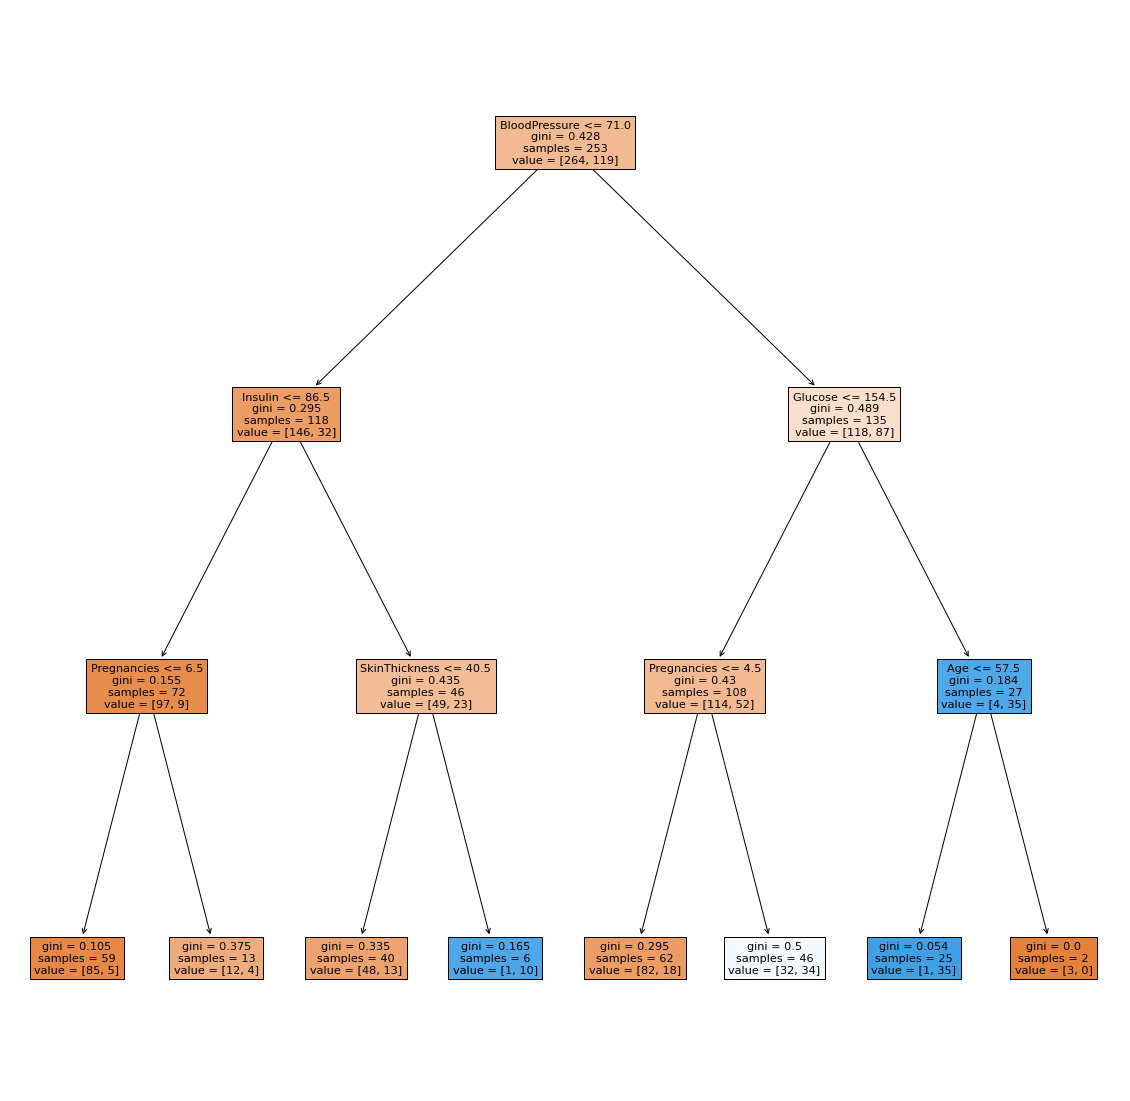

In [13]:
#Display the first tree
plt.figure(figsize=(20,20))
phn = tree.plot_tree(rfc.estimators_[0], feature_names = x.columns, filled=True)

EXPERIMENTING WITH VARIOUS TEST_SIZE VALUES

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
# random forest model creation
rfcA = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=20)
rfcA.fit(x_train,y_train)
# predictions
rfc_predict = rfcA.predict(x_test)
# classification report
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.76      0.95      0.85        44
           1       0.78      0.35      0.48        20

    accuracy                           0.77        64
   macro avg       0.77      0.65      0.67        64
weighted avg       0.77      0.77      0.73        64





In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# random forest model creation
rfcB = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=20)
rfcB.fit(x_train,y_train)
# predictions
rfc_predict = rfcB.predict(x_test)
# classification report
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.78      0.96      0.86        92
           1       0.73      0.31      0.43        36

    accuracy                           0.77       128
   macro avg       0.76      0.63      0.64       128
weighted avg       0.77      0.77      0.74       128





In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# random forest model creation
rfcC = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=20)
rfcC.fit(x_train,y_train)
# predictions
rfc_predict = rfcC.predict(x_test)
# classification report
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.77      0.97      0.86       132
           1       0.84      0.35      0.49        60

    accuracy                           0.78       192
   macro avg       0.80      0.66      0.68       192
weighted avg       0.79      0.78      0.74       192





In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
# random forest model creation
rfcD = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=20)
rfcD.fit(x_train,y_train)
# predictions
rfc_predict = rfcD.predict(x_test)
# classification report
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.76      0.98      0.85       173
           1       0.90      0.34      0.49        83

    accuracy                           0.77       256
   macro avg       0.83      0.66      0.67       256
weighted avg       0.80      0.77      0.74       256





In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)
# random forest model creation
rfcE = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=20)
rfcE.fit(x_train,y_train)
# predictions
rfc_predict = rfcE.predict(x_test)
# classification report
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       220
           1       0.94      0.31      0.47       100

    accuracy                           0.78       320
   macro avg       0.85      0.65      0.66       320
weighted avg       0.82      0.78      0.74       320





In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=42)
# random forest model creation
rfcF = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=20)
rfcF.fit(x_train,y_train)
# predictions
rfc_predict = rfcF.predict(x_test)
# classification report
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.75      0.98      0.85       259
           1       0.89      0.31      0.46       125

    accuracy                           0.76       384
   macro avg       0.82      0.65      0.65       384
weighted avg       0.79      0.76      0.72       384





In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=42)
# random forest model creation
rfcG = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=20)
rfcG.fit(x_train,y_train)
# predictions
rfc_predict = rfcG.predict(x_test)
# classification report
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.75      0.98      0.85       303
           1       0.88      0.32      0.47       145

    accuracy                           0.77       448
   macro avg       0.82      0.65      0.66       448
weighted avg       0.79      0.77      0.73       448





In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)
# random forest model creation
rfcH = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=20)
rfcH.fit(x_train,y_train)
# predictions
rfc_predict = rfcH.predict(x_test)
# classification report
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.72      0.99      0.84       346
           1       0.90      0.22      0.35       166

    accuracy                           0.74       512
   macro avg       0.81      0.60      0.59       512
weighted avg       0.78      0.74      0.68       512





In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=42)
# random forest model creation
rfcI = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=20)
rfcI.fit(x_train,y_train)
# predictions
rfc_predict = rfcI.predict(x_test)
# classification report
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.69      0.99      0.82       392
           1       0.86      0.07      0.12       184

    accuracy                           0.70       576
   macro avg       0.78      0.53      0.47       576
weighted avg       0.75      0.70      0.60       576





EXPERIMENTING WITH VARIOUS N ESTIMATOR VALUES

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# random forest model creation
rfc1 = RandomForestClassifier(n_estimators=100, max_depth=3, min_samples_split=20)
rfc1.fit(x_train,y_train)
# predictions
rfc_predict = rfc1.predict(x_test)
# classification report
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.78      0.98      0.87        92
           1       0.85      0.31      0.45        36

    accuracy                           0.79       128
   macro avg       0.81      0.64      0.66       128
weighted avg       0.80      0.79      0.75       128





In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# random forest model creation
rfc2 = RandomForestClassifier(n_estimators=200, max_depth=3, min_samples_split=20)
rfc2.fit(x_train,y_train)
# predictions
rfc_predict = rfc2.predict(x_test)
# classification report
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        92
           1       0.79      0.31      0.44        36

    accuracy                           0.78       128
   macro avg       0.78      0.64      0.65       128
weighted avg       0.78      0.78      0.74       128





In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# random forest model creation
rfc5 = RandomForestClassifier(n_estimators=500, max_depth=3, min_samples_split=20)
rfc5.fit(x_train,y_train)
# predictions
rfc_predict = rfc5.predict(x_test)
# classification report
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        92
           1       0.79      0.31      0.44        36

    accuracy                           0.78       128
   macro avg       0.78      0.64      0.65       128
weighted avg       0.78      0.78      0.74       128





In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# random forest model creation
rfc6 = RandomForestClassifier(n_estimators=800, max_depth=3, min_samples_split=20)
rfc6.fit(x_train,y_train)
# predictions
rfc_predict = rfc6.predict(x_test)
# classification report
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        92
           1       0.80      0.33      0.47        36

    accuracy                           0.79       128
   macro avg       0.79      0.65      0.67       128
weighted avg       0.79      0.79      0.76       128





In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# random forest model creation
rfc7 = RandomForestClassifier(n_estimators=1000, max_depth=3, min_samples_split=20)
rfc7.fit(x_train,y_train)
# predictions
rfc_predict = rfc7.predict(x_test)
# classification report
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        92
           1       0.79      0.31      0.44        36

    accuracy                           0.78       128
   macro avg       0.78      0.64      0.65       128
weighted avg       0.78      0.78      0.74       128





In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# random forest model creation
rfc8 = RandomForestClassifier(n_estimators=1500, max_depth=3, min_samples_split=20)
rfc8.fit(x_train,y_train)
# predictions
rfc_predict = rfc8.predict(x_test)
# classification report
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.78      0.97      0.86        92
           1       0.79      0.31      0.44        36

    accuracy                           0.78       128
   macro avg       0.78      0.64      0.65       128
weighted avg       0.78      0.78      0.74       128





In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# random forest model creation
rfc9 = RandomForestClassifier(n_estimators=2000, max_depth=3, min_samples_split=20)
rfc9.fit(x_train,y_train)
# predictions
rfc_predict = rfc9.predict(x_test)
# classification report
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.79      0.97      0.87        92
           1       0.80      0.33      0.47        36

    accuracy                           0.79       128
   macro avg       0.79      0.65      0.67       128
weighted avg       0.79      0.79      0.76       128





NEURAL NETWORK

In [36]:
#Import more libraries
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from keras.layers import Activation, Dense, Dropout, BatchNormalization, Input
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
%matplotlib inline
plt.style.use('fivethirtyeight')

In [31]:
df.SkinThickness.replace(0, df.SkinThickness.median(), inplace=True)
df.Insulin.replace(0, df.Insulin.median(), inplace=True)
df.Glucose.replace(0, df.Glucose.median(), inplace=True)
df.BloodPressure.replace(0, df.BloodPressure.median(), inplace=True)
df.BMI.replace(0, df.BMI.median(), inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inpla

In [37]:
X = df.drop('Outcome', axis =1).values
y = df.Outcome.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
nl = Normalizer()
nl.fit(X_train)
X_train = nl.transform(X_train)
X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=2)
X_dev = nl.transform(X_dev)
X_test = nl.transform(X_test)

In [38]:
def nn():
    inputs = Input(name='inputs', shape=[X_train.shape[1],])
    layer = Dense(128, name='FC1')(inputs)
    layer = BatchNormalization(name='BC1')(layer)
    layer = Activation('relu', name='Activation1')(layer)
    layer = Dropout(0.3, name='Dropout1')(layer)
    layer = Dense(128, name='FC2')(layer)
    layer = BatchNormalization(name='BC2')(layer)
    layer = Activation('relu', name='Activation2')(layer)
    layer = Dropout(0.3, name='Dropout2')(layer)
    layer = Dense(128, name='FC3')(layer)
    layer = BatchNormalization(name='BC3')(layer)
    layer = Dropout(0.3, name='Dropout3')(layer)
    layer = Dense(1, name='OutLayer')(layer)
    layer = Activation('sigmoid', name='sigmoid')(layer)
    model = Model(inputs=inputs, outputs=layer)
    return model

In [39]:
model = nn()
model.summary()

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau()
early_stopping = EarlyStopping(patience=20, min_delta=0.0001)
model.fit(x=X_train, y=y_train, epochs=200, validation_data=(X_dev, y_dev), callbacks=[reduce_lr, early_stopping], verbose=0)

x_lst = [X_train, X_dev, X_test]
y_lst = [y_train, y_dev, y_test]
for i,(x,y) in enumerate(zip(x_lst, y_lst)):
    y_pred = model.predict(x)
    y_pred = np.around(y_pred)
    y_pred = np.asarray(y_pred)
    if i == 0:
        print('Training set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred),
                                                      
classification_report(y, y_pred)))
    elif i == 1:
        print('Dev set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred), 
                                                                  classification_report(y, y_pred)))
    else:
        print('Test set:')
        print('\tAccuracy:{:0.3f}\n\tClassification Report\n{}'.format(accuracy_score(y, y_pred), 
                                                                  classification_report(y, y_pred)))                                                                

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 8)]               0         
                                                                 
 FC1 (Dense)                 (None, 128)               1152      
                                                                 
 BC1 (BatchNormalization)    (None, 128)               512       
                                                                 
 Activation1 (Activation)    (None, 128)               0         
                                                                 
 Dropout1 (Dropout)          (None, 128)               0         
                                                                 
 FC2 (Dense)                 (None, 128)               16512     
                                                                 
 BC2 (BatchNormalization)    (None, 128)               512 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat